In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
listings <- read_csv("listingsa.csv")
cal <- read_csv("calendar.csv")
listings_full <- read_csv("listings.csv")

Parsed with column specification:
cols(
  id = col_integer(),
  name = col_character(),
  host_id = col_integer(),
  host_name = col_character(),
  neighbourhood_group = col_character(),
  neighbourhood = col_character(),
  latitude = col_double(),
  longitude = col_double(),
  room_type = col_character(),
  price = col_integer(),
  minimum_nights = col_integer(),
  number_of_reviews = col_integer(),
  last_review = col_date(format = ""),
  reviews_per_month = col_double(),
  calculated_host_listings_count = col_integer(),
  availability_365 = col_integer()
)
Parsed with column specification:
cols(
  listing_id = col_integer(),
  date = col_date(format = ""),
  available = col_character(),
  price = col_character()
)
Parsed with column specification:
cols(
  .default = col_character(),
  id = col_integer(),
  scrape_id = col_double(),
  last_scraped = col_date(format = ""),
  host_id = col_integer(),
  host_since = col_date(format = ""),
  host_listings_count = col_integer(),
  host_to

In [24]:
list_df <- listings %>% select(id, neighbourhood_group, neighbourhood, latitude, longitude)

cal_df <- cal %>% filter(available=="t") %>% select(listing_id, date, available)
colnames(cal_df)[colnames(cal_df) == 'listing_id'] <- 'id'

full_df <- left_join(cal_df, list_df)
head(full_df)

Joining, by = "id"


id,date,available,neighbourhood_group,neighbourhood,latitude,longitude
2515,2018-02-03,t,Manhattan,Harlem,40.7992,-73.95368
2515,2018-02-02,t,Manhattan,Harlem,40.7992,-73.95368
2515,2018-02-01,t,Manhattan,Harlem,40.7992,-73.95368
2515,2018-01-31,t,Manhattan,Harlem,40.7992,-73.95368
2515,2018-01-30,t,Manhattan,Harlem,40.7992,-73.95368
2515,2018-01-29,t,Manhattan,Harlem,40.7992,-73.95368


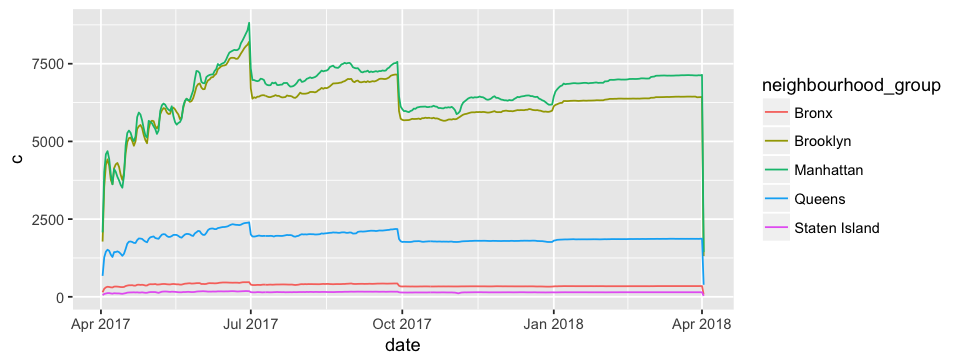

In [23]:
#available airbnb's by borrough
options(repr.plot.width = 8, repr.plot.height = 3)
p <- full_df %>% group_by(neighbourhood_group, date) %>% summarize(c = n())
ggplot(p, aes(x=date, y=c, color=neighbourhood_group)) + geom_line()

Joining, by = "neighbourhood"


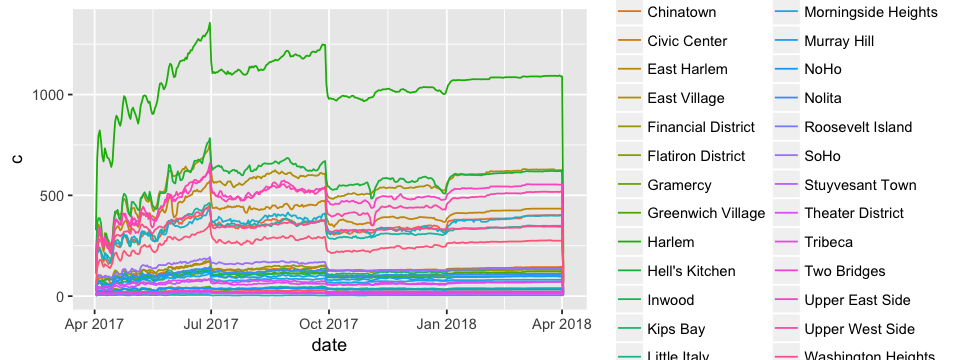

In [11]:
#available airbnb's by neighbourhood
q <- full_df %>% group_by(neighbourhood, date) %>% summarize(c = n())

neigh <- list_df %>% select(neighbourhood_group, neighbourhood) 
neigh <- unique(neigh)

q_plot <- left_join(q, neigh) 

man_plot <- q_plot %>% filter(neighbourhood_group=="Manhattan")
bk_plot <- q_plot %>% filter(neighbourhood_group=="Brooklyn")
queens_plot <- q_plot %>% filter(neighbourhood_group=="Queens")

ggplot(man_plot, aes(x=date, y=c, color=neighbourhood)) + geom_line() 

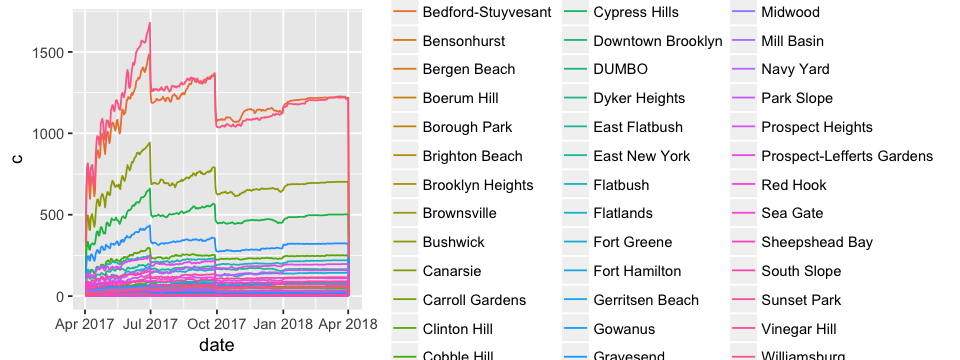

In [12]:
ggplot(bk_plot, aes(x=date, y=c, color=neighbourhood)) + geom_line()

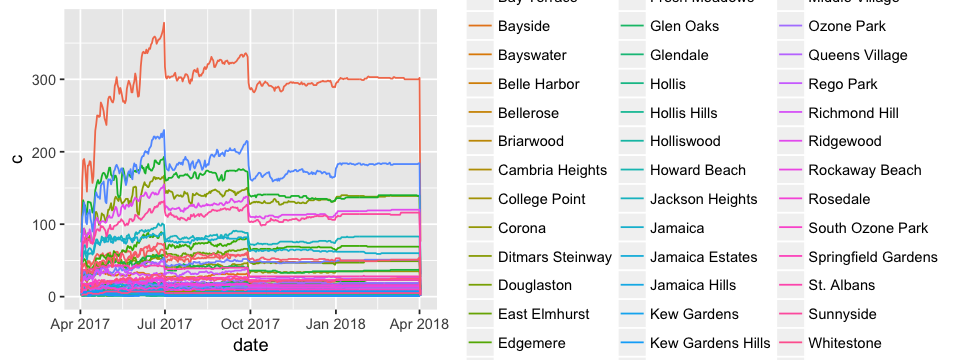

In [13]:
ggplot(queens_plot, aes(x=date, y=c, color=neighbourhood)) + geom_line()

Joining, by = "id"


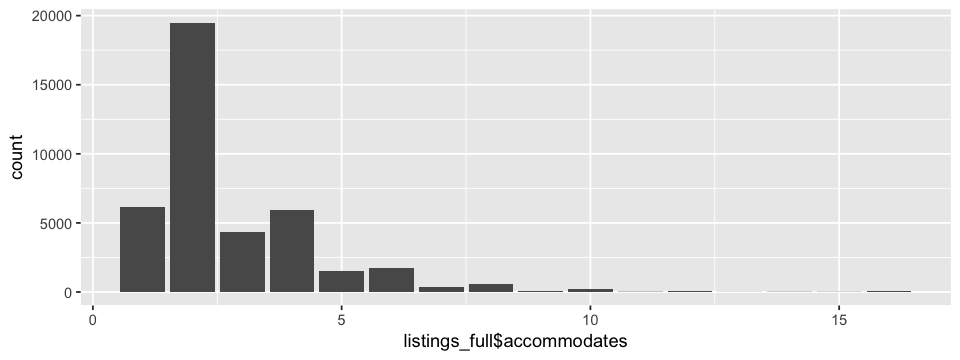

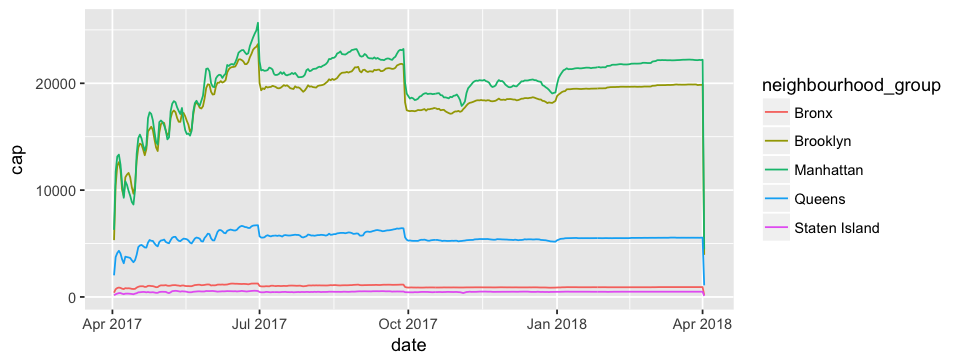

In [14]:
#####Accomodations
ggplot(listings_full, aes(listings_full$accommodates)) + geom_bar()

accom <- listings_full %>% select(id, accommodates)
accom_df <- left_join(full_df, accom) 

ac <- accom_df %>% group_by(neighbourhood_group, date) %>% summarize(cap = sum(accommodates))
ggplot(ac, aes(x=date, y=cap, color=neighbourhood_group)) + geom_line()

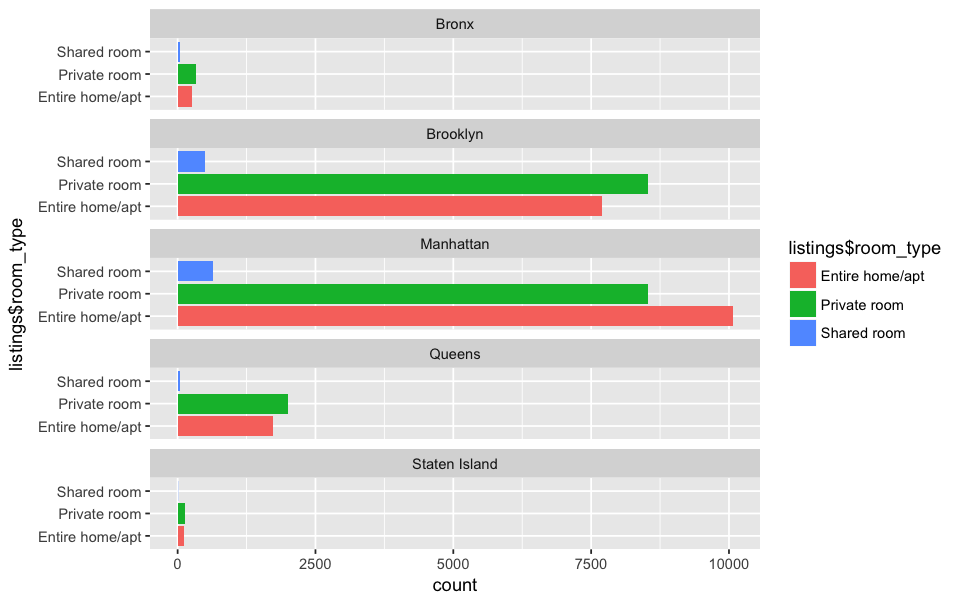

In [16]:
##Room Type
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(listings, aes(listings$room_type, fill=listings$room_type)) + geom_bar() + 
  facet_wrap(~neighbourhood_group, ncol=1) +
  coord_flip()

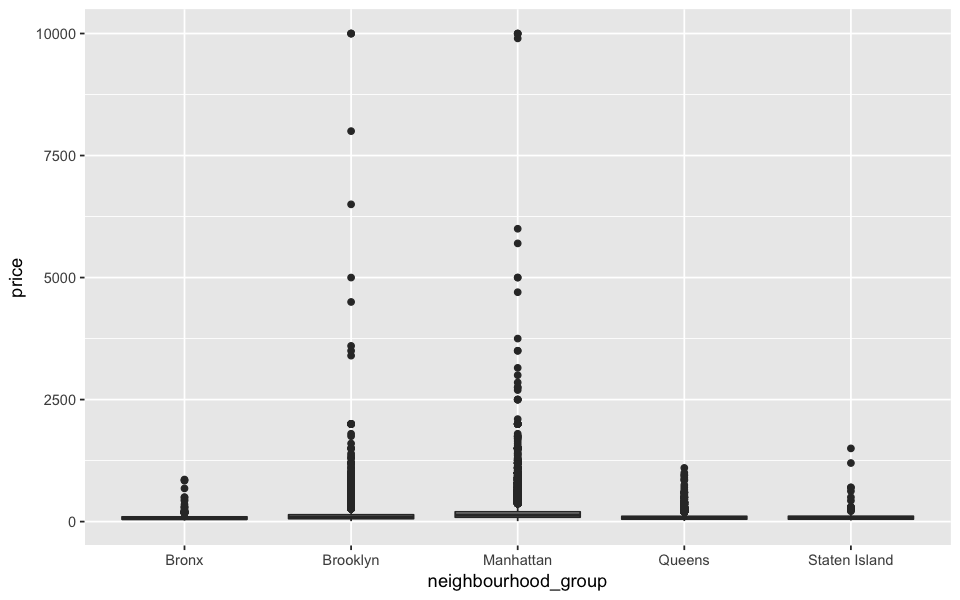

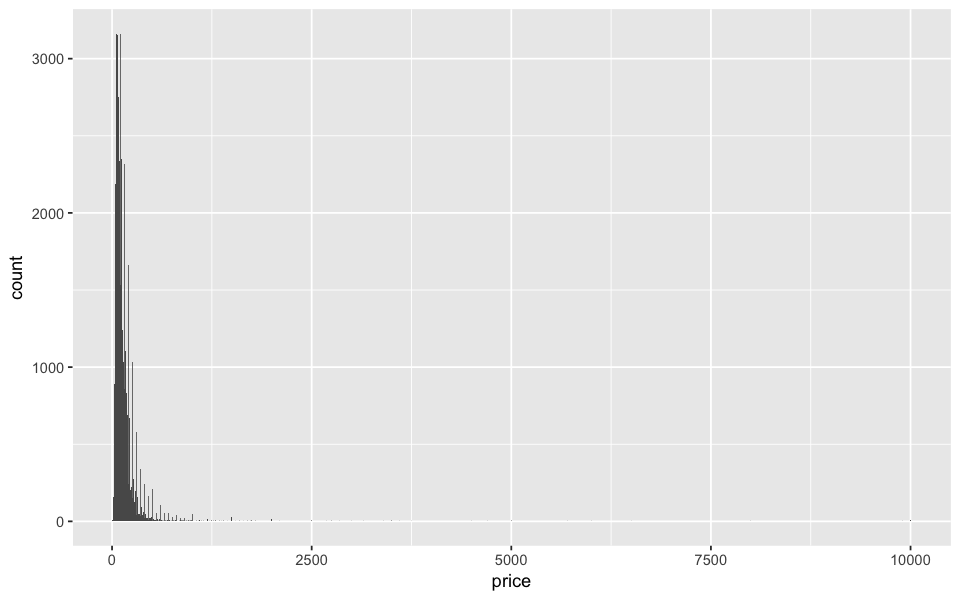

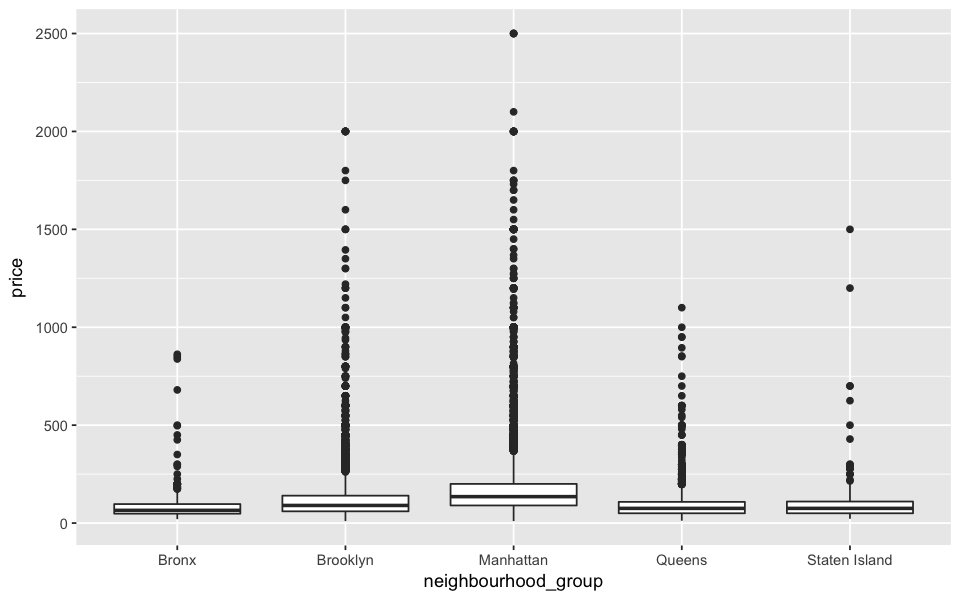

In [17]:
###Price by Neighborhood
ggplot(listings, aes(x=neighbourhood_group, y=price)) + geom_boxplot()
ggplot(listings, aes(price)) + geom_histogram(binwidth = 10) 
#remove price outliers???

price_filter <- listings %>% filter(price<=2500)
ggplot(price_filter, aes(x=neighbourhood_group, y=price)) + geom_boxplot()

In [ ]:
###How many listings have never had a review?
#Reviews are NOT required 
rev <- reviews %>% select(-id)
colnames(rev)[colnames(rev) == 'listing_id'] <- 'id'

rev_list <- left_join(listings, rev)

no_rev <- rev_list %>% filter(is.na(reviewer_id))
yes_rev <- rev_list %>% filter(!is.na(reviewer_id))
yes_rev_ids <- unique(yes_rev$id)
length(yes_rev_ids)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

[1] 59

sum(price)/365
7.734247


mean(price)
9.19544


median(price)
9


Joining, by = "listing_id"


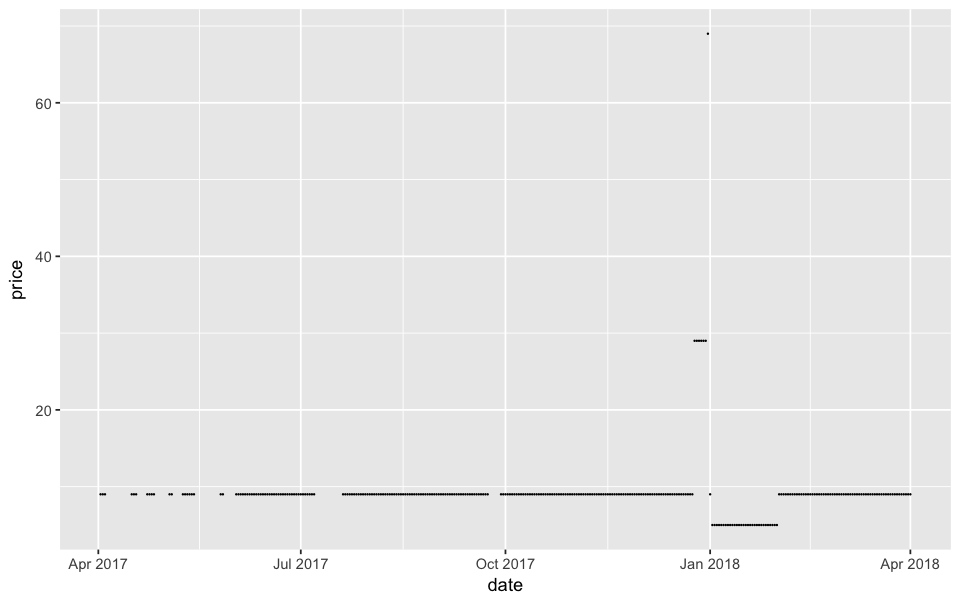

In [18]:
###Do prices change throughout the year?

cal$price <- as.numeric(substring(as.character(cal$price),2)) 

cal_f <- cal %>% filter(available=="f")
cal_t_2515 <- cal %>% filter(available=="t") %>% filter(listing_id==2515)
cal_t_2515$price <- as.numeric(substring(as.character(cal_t_2515$price),2)) 
ggplot(cal_t_2515, aes(x=date, y=price)) + geom_point(size=.01)

test <- listings %>% filter(id==2515)
test$price

cal_t_2515 %>% summarise(sum(price)/365)
cal_t_2515 %>% summarise(mean(price))
cal_t_2515 %>% summarise(median(price))

cal_t <- cal %>% filter(available=="t") %>% group_by(listing_id) %>% summarize(total_avg = sum(price)/365,
                                                                               avg_if_avail = mean(price),
                                                                               med = median(price))

listing_price <- listings %>% select(id, price)
colnames(listing_price)[colnames(listing_price) == 'id'] <- 'listing_id'
colnames(listing_price)[colnames(listing_price) == 'price'] <- 'listing_price'

cal_t_full <- left_join(cal_t, listing_price)

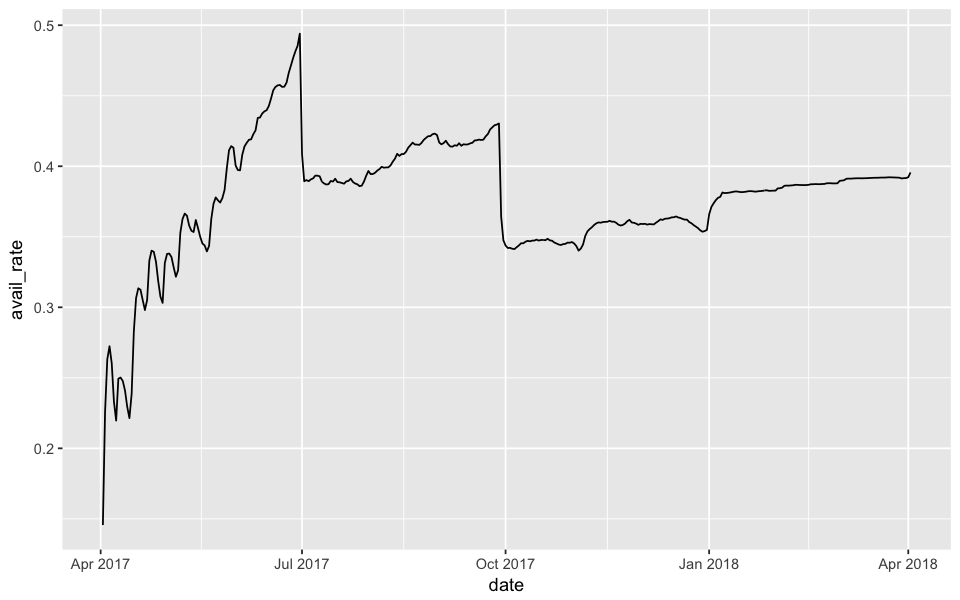

In [19]:
###What is availability rate of listings over the year?

cal2 <- cal %>% group_by(date, available) %>% summarize(num_avail = n())
cal2_spread <- cal2 %>% spread(available, num_avail) %>% mutate (num_lists = sum(f,t),
                                                                 avail_rate = t/num_lists) 
ggplot(cal2_spread, aes(x=date, y=avail_rate)) + geom_line()

In [27]:
cal2 <- cal %>% group_by(date, available) %>% summarize(num_avail = n())
head(cal2)

date,available,num_avail
2017-04-02,f,27722
2017-04-02,t,4725
2017-04-03,f,31438
2017-04-03,t,9191
2017-04-04,f,29936
2017-04-04,t,10693


In [28]:
cal2_spread <- cal2 %>% spread(available, num_avail) %>% mutate (num_lists = sum(f,t),
                                                                 avail_rate = t)
head(cal2_spread)

date,f,t,num_lists,avail_rate
2017-04-02,27722,4725,32447,4725
2017-04-03,31438,9191,40629,9191
2017-04-04,29936,10693,40629,10693
2017-04-05,29562,11067,40629,11067
2017-04-06,30053,10576,40629,10576
2017-04-07,31161,9468,40629,9468


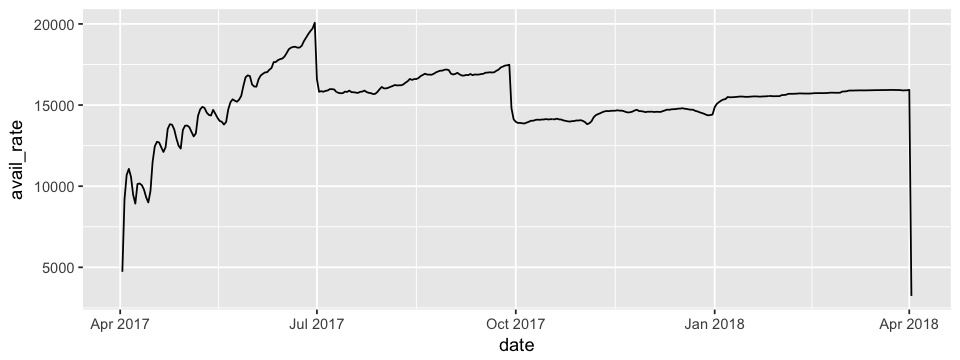

In [29]:
ggplot(cal2_spread, aes(x=date, y=avail_rate)) + geom_line()